# Using Python to perform data analytics
## Sources
https://www.ers.usda.gov/data-products/livestock-and-meat-domestic-data/
https://www.rspcaassured.org.uk/farmed-animal-welfare/chickens/fast-growing-chickens/

## Report
Livestock has been selectively bread since the early 1900s in order to increase the weight of each animal. This data shows the extent of this breeding. Chickens and Turkey's with the shortest gestation period have been affected the worst, cutting their lives in half to just 5-6 weeks and doubling their weights. In 2024 the increase in weights of Cattle, Chicken and Turkeys is not slowing down with a constant increase each year.


In [189]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings


In [190]:
sns.set_theme()
warnings.filterwarnings('ignore', 'use_inf_as_na')

In [191]:
us_data_file = r"USMeatStatsFull.xlsx"

us_weight_data_raw = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterWeights-Full",
    header=[1,2],
    index_col=0
)

In [192]:
us_weight_data = us_weight_data_raw.copy()
us_weight_data.columns.set_names(["Weight_type", "Animal"], inplace=True)
us_weight_data.rename(columns={' live':'Federally inspected average live'}, inplace=True)
us_weight_data.columns

MultiIndex([(            'Commercial average live',          'Cattle'),
            (            'Commercial average live',          'Calves'),
            (            'Commercial average live',            'Hogs'),
            (            'Commercial average live', 'Sheep and lambs'),
            (   'Federally inspected average live',          'Cattle'),
            (   'Federally inspected average live',          'Calves'),
            (   'Federally inspected average live',            'Hogs'),
            (   'Federally inspected average live', 'Sheep and lambs'),
            (   'Federally inspected average live',        'Broilers'),
            (   'Federally inspected average live',  'Other chickens'),
            (   'Federally inspected average live',         'Turkeys'),
            ('Federally inspected average dressed',          'Cattle'),
            ('Federally inspected average dressed',          'Steers'),
            ('Federally inspected average dressed',         'Hei

Cattle - All of Heifer, Steers, Cows, Bulls & Stags\
Heifers - Female cows that have not given birth yet but are older than calves\
Steers - Male cows that have been castrated\
Cows - Female cows that have given birth


In [193]:
print(us_weight_data.isna().sum())
print(us_weight_data[us_weight_data.isna().sum(axis=1) > 0].index)

Weight_type                          Animal         
Commercial average live              Cattle             284
                                     Calves             284
                                     Hogs               284
                                     Sheep and lambs    282
Federally inspected average live     Cattle               8
                                     Calves               8
                                     Hogs                 8
                                     Sheep and lambs      8
                                     Broilers           468
                                     Other chickens     468
                                     Turkeys            468
Federally inspected average dressed  Cattle               8
                                     Steers             476
                                     Heifers            476
                                     Cows               476
                                     Bulls and 

In [194]:
us_weight_data.index = pd.to_datetime(us_weight_data.index, format="%b-%Y")
us_weight_data.rename_axis('Date')
print(us_weight_data.dtypes)
print(us_weight_data.index.dtype)

Weight_type                          Animal         
Commercial average live              Cattle             float64
                                     Calves             float64
                                     Hogs               float64
                                     Sheep and lambs    float64
Federally inspected average live     Cattle             float64
                                     Calves             float64
                                     Hogs               float64
                                     Sheep and lambs    float64
                                     Broilers           float64
                                     Other chickens     float64
                                     Turkeys            float64
Federally inspected average dressed  Cattle             float64
                                     Steers             float64
                                     Heifers            float64
                                     Cows          

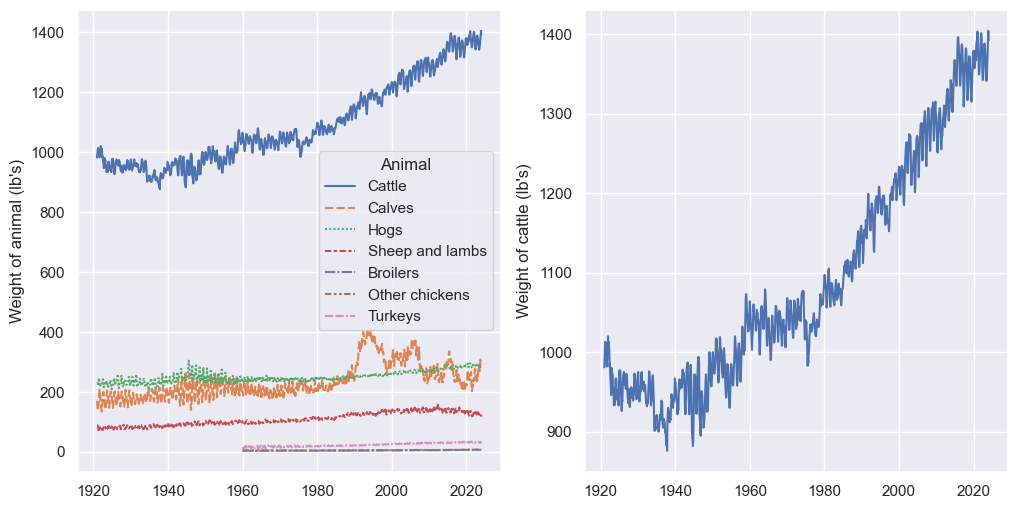

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
ax = sns.lineplot(us_weight_data['Federally inspected average live'], ax=axes[0])
ax.set_ylabel("Weight of animal (lb's)")
ax = sns.lineplot(us_weight_data['Federally inspected average live']['Cattle'], ax=axes[1])
ax.set_ylabel("Weight of cattle (lb's)")


animal_list = us_weight_data['Federally inspected average live'].columns

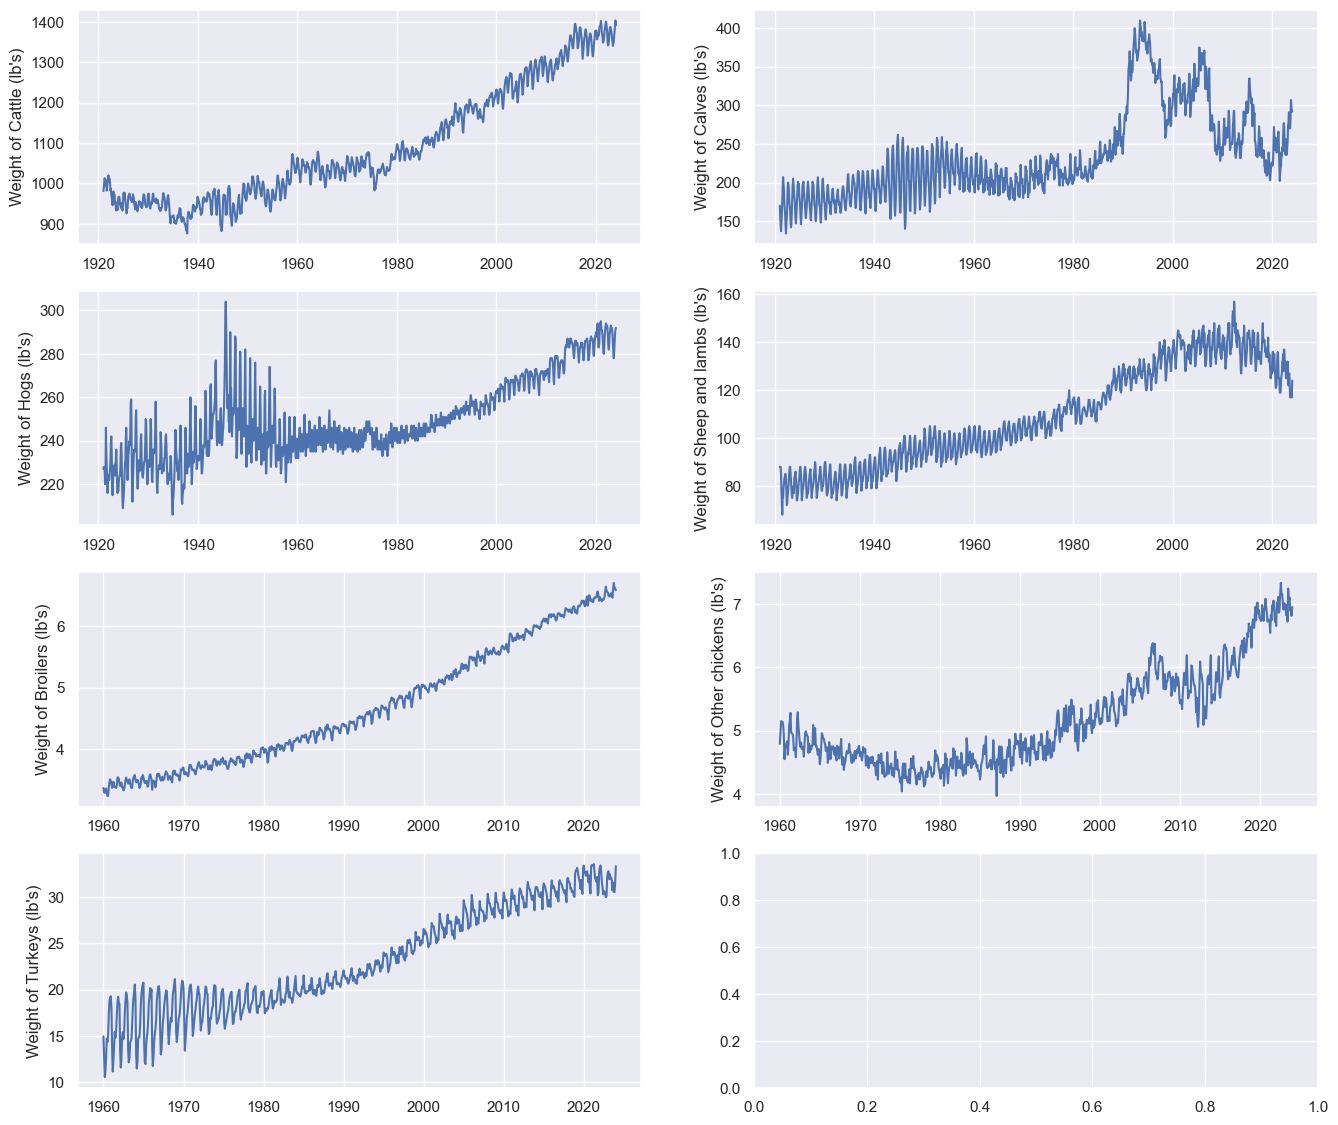

In [196]:
fig, axes = plt.subplots(math.ceil(len(animal_list)/2), 2, figsize=(16,14))
for idx, animal in enumerate(animal_list):
    ax = sns.lineplot(us_weight_data['Federally inspected average live'][animal], ax=axes[idx//2, idx%2])
    ax.set_ylabel(f"Weight of {animal} (lb's)")

Since 1980, the rate of increase of the live weight of Cattle, Hogs, Broilers and Turkeys has stayed roughly constant.

[7.58407177]
Between 1980 and 2024 average growth was 7.584 pounds per year
[1.17070471]
Between 1980 and 2024 average growth was 1.171 pounds per year
[0.06336841]
Between 1980 and 2024 average growth was 0.063 pounds per year
[0.34570845]
Between 1980 and 2024 average growth was 0.346 pounds per year


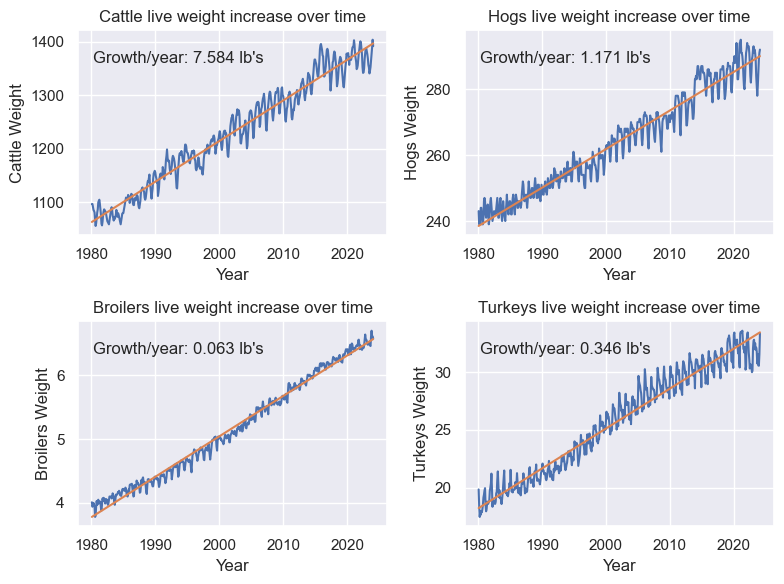

In [197]:

def date_vs_nums_regression_plot(df, title, y_units, axes):
    df = df.dropna()
    first_year = df.index.min().year
    last_year = df.index.max().year
    dates = (df.index.year.astype(int) + df.index.month.astype(int)/12).values
    X = dates.reshape(-1, 1)
    
    y = df.values
    model = LinearRegression()
    model.fit(X, y)

    sns.lineplot(x = dates, y=y, ax=axes)
    print(model.coef_)
    growth = round(model.coef_[0], 3)
    
    y_pred = model.predict(X)
    sns.lineplot(x = dates, y = y_pred, ax=axes)
    axes.set_title(title)
    axes.set_xlabel("Year")
    axes.set_ylabel(f"{df.name} Weight")
    axes.text(0.05, 0.9, f'Growth/year: {growth} lb\'s', ha='left', va='top', transform = axes.transAxes)
    print(f"Between {first_year} and {last_year} average growth was {growth} {y_units} per year")

    return growth
    

animal_list = ["Cattle", "Hogs", "Broilers", "Turkeys"]
fig, axes = plt.subplots(math.ceil(len(animal_list)/2), 2, figsize=(8, 6))
animal_growth_live = {}
for idx, animal in enumerate(animal_list):
    row, col = divmod(idx, 2)
    animal_growth_live[animal] = (date_vs_nums_regression_plot(us_weight_data['Federally inspected average live'][animal][us_weight_data.index >= "1980"],
                                                          f'{animal} live weight increase over time', 'pounds',
                                                          axes[row, col]))
fig.tight_layout() 


So between 1980 and 2024 the average American cow has got 7.6lbs bigger per year, that's 15 more steaks per cow.

[4.92405336]
Between 1980 and 2024 average growth was 4.924 pounds per year
[5.15243457]
Between 1980 and 2024 average growth was 5.152 pounds per year
[5.47967691]
Between 1980 and 2024 average growth was 5.48 pounds per year
[3.58781914]
Between 1980 and 2024 average growth was 3.588 pounds per year


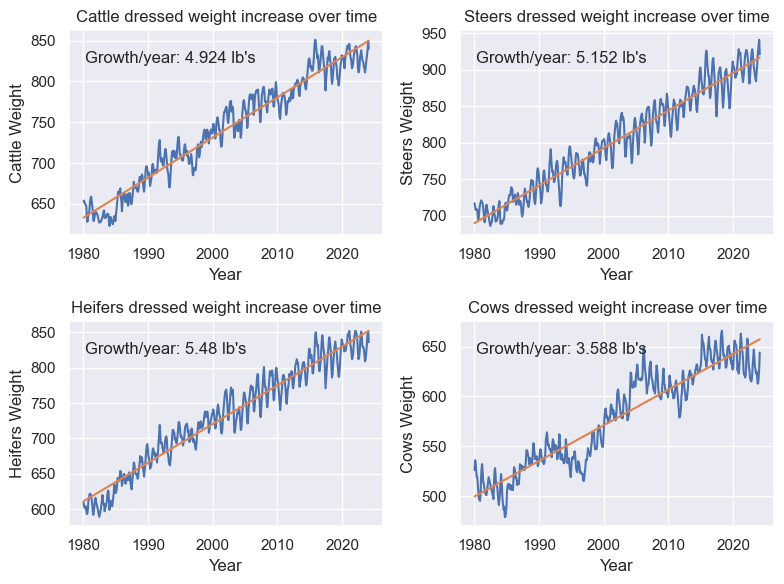

In [198]:
animal_list = ["Cattle", "Steers", "Heifers", "Cows"]
fig, axes = plt.subplots(math.ceil(len(animal_list)/2), 2, figsize=(8, 6))
animal_growth_dressed = {}
for idx, animal in enumerate(animal_list):
    row, col = divmod(idx, 2)
    animal_growth_dressed[animal] = date_vs_nums_regression_plot(us_weight_data['Federally inspected average dressed'][animal][us_weight_data.index >= "1980"],
                                                          f'{animal} dressed weight increase over time', 'pounds',
                                                          axes[row, col])
fig.tight_layout() 

(40.0, 80.0)

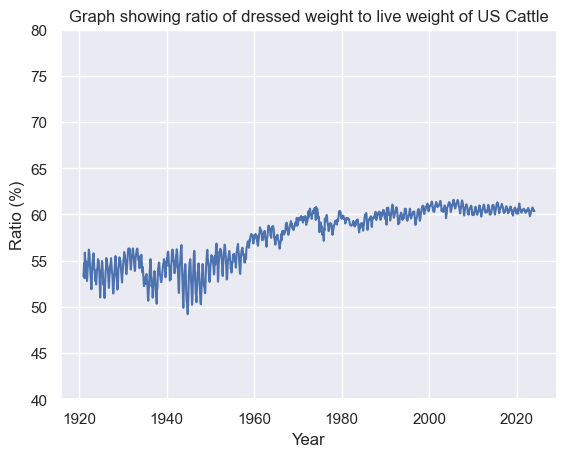

In [199]:
us_weight_data[('Dressed weight ratio', 'Cattle')] = 100 * us_weight_data['Federally inspected average dressed']['Cattle'] / us_weight_data['Federally inspected average live']['Cattle'] 
ax = sns.lineplot(us_weight_data['Dressed weight ratio']['Cattle'])
ax.set_xlabel("Year")
ax.set_ylabel("Ratio (%)")
ax.set_title("Graph showing ratio of dressed weight to live weight of US Cattle")
ax.set_ylim(40,80)

In [214]:

us_lw_1980 = us_weight_data['Federally inspected average live']['Cattle'][us_weight_data.index >= "1980"]
base_weight = us_lw_1980.iloc[-1]
base_year = us_lw_1980.index.year.astype(int).min() + (us_lw_1980.index.month.astype(int).min()-1)/12
base_year


1980.0

In [215]:
lw_transformed = us_lw_1980[us_lw_1980.index >= "1980"] - \
    animal_growth_live["Cattle"]*(us_lw_1980.index.year.astype(int) + (us_lw_1980.index.month.astype(int)-1)/12 - base_year) 
lw_transformed

2024-01-01    1058.304
2023-12-01    1070.936
2023-11-01    1057.568
2023-10-01    1046.200
2023-09-01    1033.832
                ...   
1980-05-01    1081.472
1980-04-01    1084.104
1980-03-01    1090.736
1980-02-01    1096.368
1980-01-01    1097.000
Length: 529, dtype: float64

<Axes: >

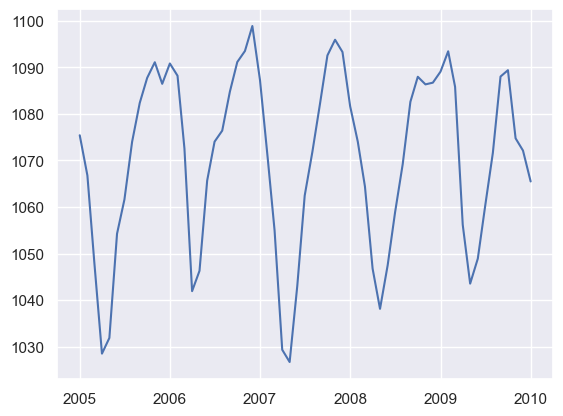

In [216]:
lw_transformed.sort_index(inplace=True)
sns.lineplot(lw_transformed['2005-01-01':'2010-01-01'])

These look like yearly cycles, with peaks near the end of the year.

In [217]:

slaughter_count = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterCounts-Full",
    header=[1,2],
    index_col=0
)


In [205]:
cattle_cols = ["Cattle", "Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]
slaughter_count_cattle = slaughter_count["Federally inspected 3/"][cattle_cols]
slaughter_count_cattle.index = pd.to_datetime(slaughter_count_cattle.index, format="%b-%Y")
slaughter_count_cattle.sort_index(inplace=True)
slaughter_count_cattle = slaughter_count_cattle['1980':]
slaughter_count_cattle

,Cattle,Steers,Heifers,Beef cows,Dairy cows,Bulls and stags
1980-01-01,2738.7,1444.0,720.0,260.0,260.0,54.0
1980-02-01,2485.7,1333.0,672.0,216.0,216.0,49.0
1980-03-01,2403.0,1303.0,646.0,203.0,203.0,49.0
1980-04-01,2539.5,1373.0,686.0,215.0,215.0,52.0
1980-05-01,2616.4,1392.0,740.0,215.0,216.0,54.0
...,...,...,...,...,...,...
2023-09-01,2559.8,1206.5,788.6,275.8,240.5,48.4
2023-10-01,2767.7,1274.1,870.0,330.7,242.9,50.0
2023-11-01,2681.3,1209.2,856.9,341.0,229.7,44.4
2023-12-01,2548.8,1197.8,797.2,291.9,224.7,37.2


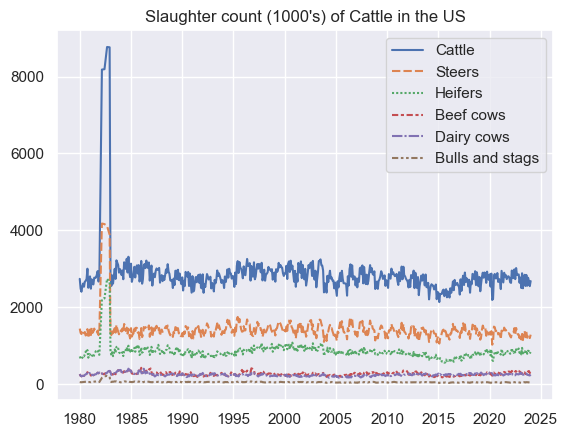

In [218]:
ax = sns.lineplot(slaughter_count_cattle)
ax.set_title("Slaughter count (1000's) of Cattle in the US")
base_cattle_cols = ["Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]

C:\Users\Oscar\AppData\Local\Temp\ipykernel_18744\1234781008.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(slaughter_base_cattle_3years, palette=palette)


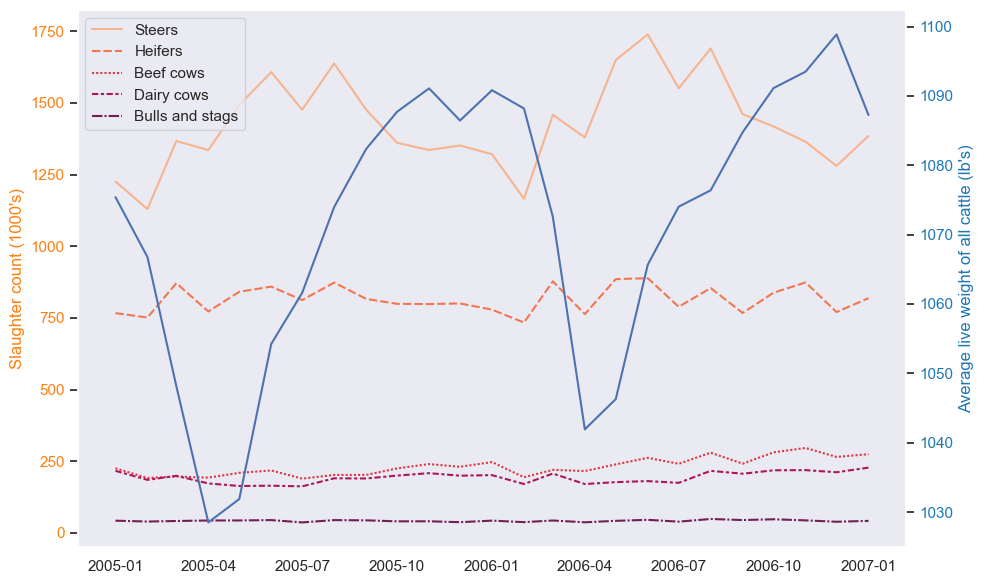

In [219]:
slaughter_base_cattle_3years = slaughter_count_cattle[base_cattle_cols]['2005-01-01':'2007-01-01']
fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
color = 'tab:orange'
ax1.set_ylabel('Slaughter count (1000\'s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid(None)
palette = sns.color_palette("rocket_r")
sns.lineplot(slaughter_base_cattle_3years, palette=palette)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average live weight of all cattle (lb\'s)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(None)
sns.lineplot(lw_transformed['2005-01-01':'2007-01-01'], ax=ax2)
fig.tight_layout()


This graph shows as the number of Steers being slaughtered each month decreases, the average live weight of cattle decreases. This is expected since Steers are both the heaviest and the largest in number being slaughtered.

In [220]:
# Average live weight of each animal
laws = us_weight_data['Federally inspected average live']
laws = laws.dropna()
laws

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
2024-01-01,1392.0,292.0,292.0,124.0,6.58,6.95,33.35
2023-12-01,1404.0,292.0,291.0,117.0,6.61,6.81,31.56
2023-11-01,1390.0,300.0,289.0,118.0,6.61,6.92,30.55
2023-10-01,1378.0,307.0,285.0,118.0,6.70,6.89,30.57
2023-09-01,1365.0,285.0,281.0,118.0,6.61,7.10,31.55
...,...,...,...,...,...,...,...
1960-05-01,1033.0,222.0,242.0,99.0,3.36,5.14,12.66
1960-04-01,1036.0,205.0,239.0,103.0,3.35,5.12,11.20
1960-03-01,1049.0,187.0,232.0,105.0,3.29,5.15,10.53
1960-02-01,1056.0,199.0,232.0,104.0,3.30,4.97,12.79


In [221]:
avg_df = laws.groupby(by = lambda x: x.year).mean()
avg_df.index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int64')

In [222]:
year_list = [1960, 1980, 2000, 2020]
compare_df = avg_df[avg_df.index.isin(year_list)]
compare_df

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,1032.916667,211.083333,239.083333,99.250000,3.355833,4.905000,15.055833
1980,1080.000000,214.333333,242.000000,112.333333,3.947500,4.381667,18.499167
2000,1222.083333,311.833333,262.500000,136.416667,4.999167,5.310833,25.635000
2020,1376.000000,244.000000,289.000000,129.166667,6.408333,6.853333,32.272500


Animal,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,211.083333,239.083333,99.250000,3.355833,4.905000,15.055833
1980,214.333333,242.000000,112.333333,3.947500,4.381667,18.499167
2000,311.833333,262.500000,136.416667,4.999167,5.310833,25.635000
2020,244.000000,289.000000,129.166667,6.408333,6.853333,32.272500


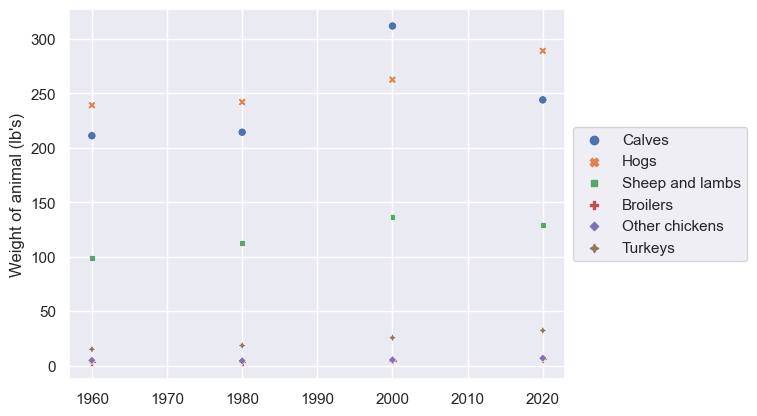

In [223]:
small_animals = ["Calves", "Hogs", "Sheep and lambs", "Broilers", "Other chickens", "Turkeys"]
g = sns.scatterplot(compare_df[small_animals])
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))
g.set_ylabel("Weight of animal (lb's)")
compare_df[small_animals]

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1980,1.045583,1.015397,1.012199,1.131822,1.176310,0.893306,1.228704
2000,1.183138,1.477300,1.097944,1.374475,1.489695,1.082739,1.702662
2020,1.332150,1.155942,1.208784,1.301427,1.909610,1.397214,2.143521


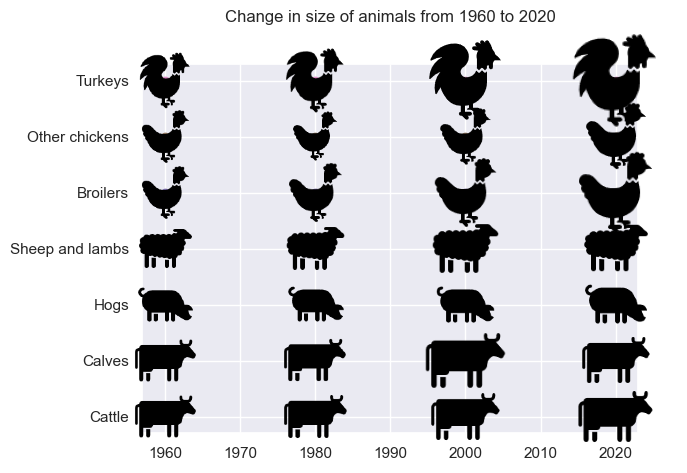

In [224]:
x = year_list
y_values = compare_df.columns

asset_folder = "assets/"
animal_imgs = ["cow.png", "cow.png", "pig.png", "sheep.png", "chicken.png", "chicken.png", "turkey.png"]

fig, ax = plt.subplots()
ax.set_title("Change in size of animals from 1960 to 2020", pad=30)

for y in y_values:
    ax.scatter(x, [y]*len(x)) 

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(os.path.join(asset_folder, path)), zoom=0.5*zoom**(2/3))

relative_weights_df = compare_df.div(compare_df.loc[1960])

for idx, y in enumerate(y_values):
    for year in x:
        ab = AnnotationBbox(getImage(animal_imgs[idx], zoom=relative_weights_df.at[year, y]), (year, y), frameon=False)
        ax.add_artist(ab)

relative_weights_df

These charts show chickens and turkeys have seen the biggest relative increase in weight since 1960, a doubling in just 60 years. This causes a variety of health problems https://www.rspcaassured.org.uk/farmed-animal-welfare/chickens/fast-growing-chickens/.

Text(0.5, 1.0, 'Relative increase in weight of livestock 1960 - 2020')

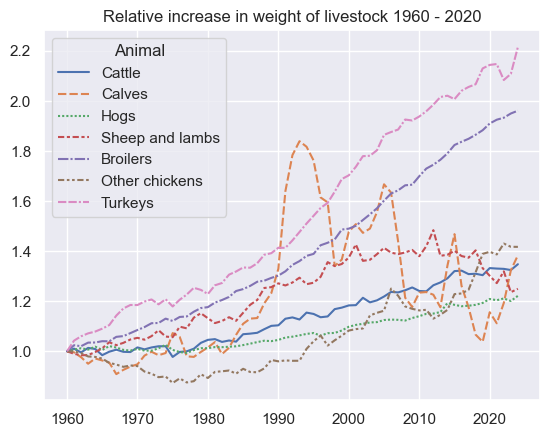

In [225]:
ax = sns.lineplot(avg_df.div(avg_df.loc[1960]))
ax.set_title("Relative increase in weight of livestock 1960 - 2020")